# Lab Activity Week 6

**Homework** Anythin you do not complete in lab is your homework. Please provide a link to your github repository as your homework submission.

### Step 1: Aquiring data

- Collect data from your weather and air quality sensors together (in the same script) for 5 minutes, taking a reading every second. 
- Make the name of the file saving the data something that is unique each time data is recorded. 
   - **HINT:** You can include the time as part of the file name, for example.
- Upload your new data to your git repository on GitHub and update the version of your respository on your laptop

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math

outdoor = pd.read_csv('CSV_FILES/20230215-160202_aq_pth.csv')
indoor = pd.read_csv('CSV_FILES/20230222-144631_aq_pth.csv')
outdoor = outdoor[-300:]
indoor = indoor.drop("Unnamed: 10", axis='columns')
indoor = indoor.drop("Local Time", axis='columns')
outdoor = outdoor.drop("Unnamed: 10", axis='columns')
outdoor = outdoor.drop("Local Time", axis='columns')

In [86]:
def plotCSV(df, title):
    plt.plot(df['Unix Time'], df['PM1.0'], label = '1 µm')
    plt.plot(df['Unix Time'], df['PM2.5'], label = '2.5 µm')
    plt.plot(df['Unix Time'], df['PM10'], label = '10 µm')
    plt.legend(loc='best')
    plt.xlabel("Time - seconds")
    plt.ylabel("Parts per million")
    plt.title(title + " - Particulate")
    plt.show()
    
    plt.figure(figsize = (20, 10))
    plt.subplot(2, 3, 1)
    plt.plot(df['Unix Time'], df['Temperature'])
    plt.xlabel("Time - seconds")
    plt.ylabel("Temperature - ˚C")
    plt.title("Temperature")
    plt.subplot(2, 3, 2)
    plt.plot(df['Unix Time'], df['Gas'])
    plt.xlabel("Time - seconds")
    plt.ylabel("Resistance - Ohms")
    plt.title("Gas")
    plt.subplot(2, 3, 3)
    plt.plot(df['Unix Time'], df['Humidity'])
    plt.xlabel("Time - seconds")
    plt.ylabel("Humidity - Percent")
    plt.title("Humidity")
    plt.subplot(2, 3, 4)
    plt.plot(df['Unix Time'], df['Pressure'])
    plt.xlabel("Time - seconds")
    plt.ylabel("Pressure - hPa")
    plt.title("Pressure")
    plt.subplot(2, 3, 5)
    plt.plot(df['Unix Time'], df['Altitude'])
    plt.xlabel("Time - seconds")
    plt.ylabel("Altitude - meters")
    plt.title("Altitude")
    
    plt.suptitle(title, fontsize = 20)
    plt.show()

In [87]:
def plotCSVoverlap(df1, df2, title1, title2):
    x = np.arange(0,df1.shape[0])
    
    plt.figure(figsize = (20, 5))
    plt.plot(x, df1['PM1.0'], label = '1 µm - ' + title1)
    plt.plot(x, df1['PM2.5'], label = '2.5 µm - ' + title1)
    plt.plot(x, df1['PM10'], label = '10 µm - ' + title1)
    plt.plot(x, df2['PM1.0'], label = '1 µm - ' + title2)
    plt.plot(x, df2['PM2.5'], label = '2.5 µm - ' + title2)
    plt.plot(x, df2['PM10'], label = '10 µm - ' + title2)
    
    plt.legend(loc='best')
    plt.xlabel("Time since start - seconds")
    plt.ylabel("Parts per million")
    plt.title("Particulate", fontsize = 20)
    plt.show()
    
    plt.figure(figsize = (20, 10))
    plt.subplot(2, 3, 1)
    plt.plot(x, df1['Temperature'], label = title1)
    plt.plot(x, df2['Temperature'], label = title2)
    plt.legend(loc='best')
    plt.xlabel("Time - seconds")
    plt.ylabel("Temperature - ˚C")
    plt.title("Temperature")
    plt.subplot(2, 3, 2)
    plt.plot(x, df1['Gas'], label = title1)
    plt.plot(x, df2['Gas'], label = title2)
    plt.legend(loc='best')
    plt.xlabel("Time - seconds")
    plt.ylabel("Resistance - Ohms")
    plt.title("Gas")
    plt.subplot(2, 3, 3)
    plt.plot(x, df1['Humidity'], label = title1)
    plt.plot(x, df2['Humidity'], label = title2)
    plt.legend(loc='best')
    plt.xlabel("Time - seconds")
    plt.ylabel("Humidity - Percent")
    plt.title("Humidity")
    plt.subplot(2, 3, 4)
    plt.plot(x, df1['Pressure'], label = title1)
    plt.plot(x, df2['Pressure'], label = title2)
    plt.legend(loc='best')
    plt.xlabel("Time - seconds")
    plt.ylabel("Pressure - hPa")
    plt.title("Pressure")
    plt.subplot(2, 3, 5)
    plt.plot(x, df1['Altitude'], label = title1)
    plt.plot(x, df2['Altitude'], label = title2)
    plt.legend(loc='best')
    plt.xlabel("Time - seconds")
    plt.ylabel("Altitude - meters")
    plt.title("Altitude")
    
    plt.suptitle("PTH Data", fontsize = 20)
    plt.show()

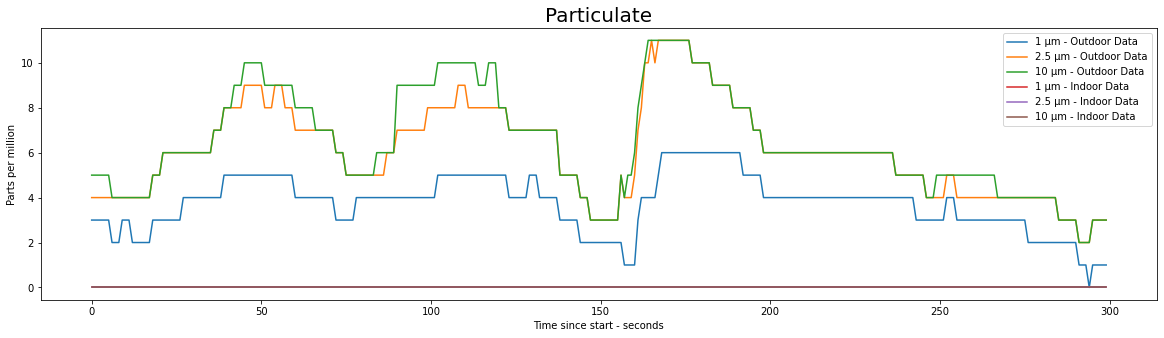

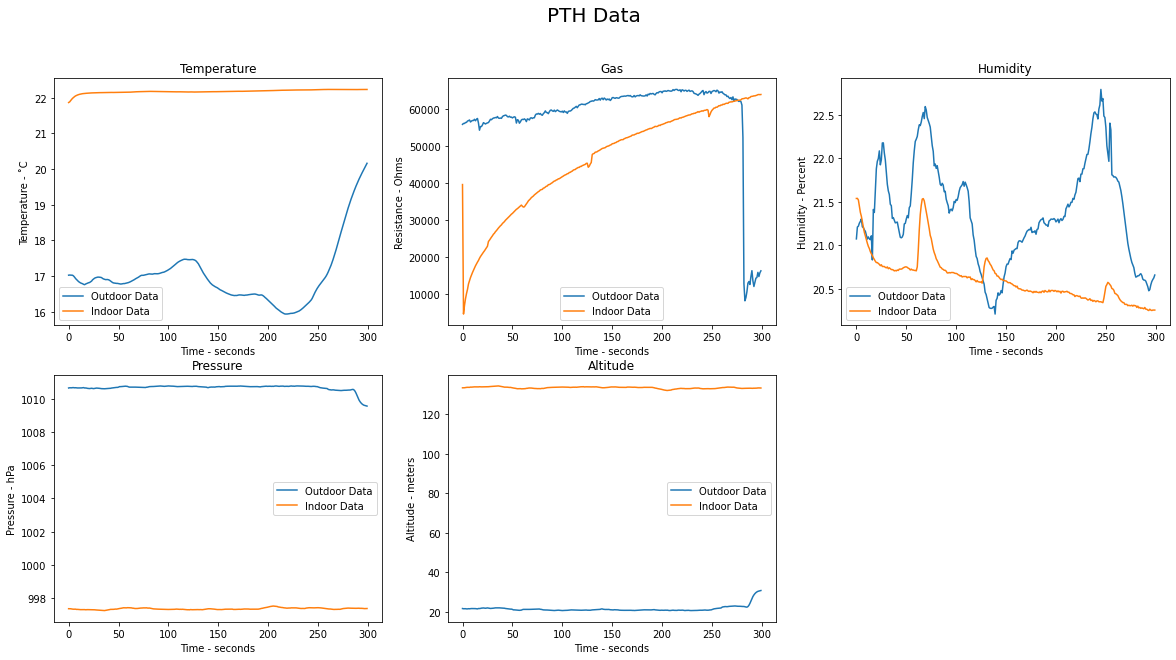

In [88]:
plotCSVoverlap(outdoor, indoor, "Outdoor Data", "Indoor Data")

### Step 2: Acquiring outdoor data
- Restart your raspberry pi system, powering it with the supplied batteries, rather than the power adaptor.
- Add a time delay to the start of your data acquisition script (as an optional user input)
- Start your data aquisition to again collect data for 5 minutes, taking readings every second, but this time with an initial ~2 minute delay (so it should run for ~7 minutes total).
- Take the whole system outdoors and wait there for the 5 minutes of data acquisition to complete.
- At your stations, again push your new data to your git repository on GitHub

### Step 3: Plotting indoor data
- Create a new Jupyter notebook and load (using pandas, for example) the data you now have from your device.
- Plot each type of data as a frequency distribution (histogram) with appropriate binning - meaning the distribution shows a good level of detail but does not have binning artifacts
- Using the mean and standard deviation of each set of data, does any of the data you have recorded look like it is well described by a normal distribution?
  - Using the mean and standard deviation, try plotting a Gaussian function along with each of your frequency distributions and see how well they match.

### Step 4: Comparing Indoor vs Outdoor data
- Produce the same plots as in Step 2 for your new outdoor data
- Now produce plots that compare indoors vs outdoors for each of your data types - don't forget labels
- Comment on your results
- Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement?
  - NOTE: The variance in your data is not the uncertainty on the mean (central limit theorem)
  - what is your mean uncertainty?
  - How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?
- If your distributions were not well described by a Gaussian, do you think you took enough data for the central limit theorem to apply?

In [92]:
outdoor_std = np.array(outdoor.std())
indoor_std = np.array(indoor.std())

outdoor_mean = np.array(outdoor.mean())
indoor_mean = np.array(indoor.mean())

print((outdoor_mean - indoor_mean)/indoor_std)

[-5.78948843e+03             inf             inf             inf
 -1.04267451e+02  8.51179780e-01  2.81277910e+00  2.60454234e+02
 -2.59061525e+02]


/var/folders/20/02_990jd54b9kn8r1w4f8r880000gn/T/ipykernel_26846/2454518645.py:7: RuntimeWarning: divide by zero encountered in true_divide
  print((outdoor_mean - indoor_mean)/indoor_std)


In [93]:
their_outdoor = pd.read_csv('pranava_outdoor_data.csv')
their_outdoor.shape

(253, 10)

### Step 5: Comparing sensors
- Get data from another group in your lab and compare your inside data with their inside data, including all of elements from Step 4. Do the same comparing your outside data with their outside data.
- How do the sensors compare? What do you think this indicates about the accuracy and precision of your sensors?

### Extra: Correlations in data
- Plot temperature vs humidity
  - NOTE: These were taken by the same sensor at the same time, so each measurement matches up in time, meaning plotting one versus the other works. 
  - What is the hidden variable that is important when making plots like this?
- What does this plot show? Are temperature and humidity correlated? How might you quantify this?

- Plot temperature vs another property measured by that sensor, are they correlated? Is the correlation qualitatively similar to what you see from temperature vs humidity?
  - try this for all data types (temp. vs pressure, temp. vs voc, etc.)
  
- Plot temperature vs PM2.5 concentration and discuss as with the previous comparisons.